# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [131]:
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## OWN FUNCTIONS
import support_functions
from support_functions import *

In [132]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

/Users/mikelgallo/anaconda3/envs/text_2/lib/python3.12/site-packages/datasets/load.py:1461: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


### Characteristics of the dataset

**b. Dataset Description (0.5 points): Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.**

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [133]:
## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']

## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

### Dataset size

In [134]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

Dataset Split [TRAIN, TEST]


,SET,ROWS,SPLIT
0,TRAIN,149985,0.708
1,TEST,61998,0.292
2,TOTAL,211983,1.000


TRAIN Split [train, validation]


,SET,ROWS,SPLIT
0,train,119988,0.8
1,validation,29997,0.2
2,TRAIN,149985,1.0


### Class distribution

In [135]:
## Class balance of our datasets
print('train')
class_prop(train_labels)
print('validation')
class_prop(validation_labels)
print('test')
class_prop(test_labels)

train
   class  count    perc
0      1  60019  0.5002
1      0  59969  0.4998
validation
   class  count    perc
0      0  15050  0.5017
1      1  14947  0.4983
test
   class  count    perc
0      1  31029  0.5005
1      0  30969  0.4995


### Distribution of text lengths (train set only)

In [136]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [137]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

['@fa6ami86', 'so', 'happy', 'that', 'salman', 'won.', 'btw', 'the', '14sec', 'clip', 'is', 'truely', 'a', 'teaser'] length:  14
['@phantompoptart', '.......oops....', 'I', 'guess', "I'm", 'kinda', 'out', 'of', 'it....', 'Blonde', 'moment', '-blushes-', 'epic', 'fail'] length:  14
['@bradleyjp', 'decidedly', 'undecided.', 'Depends', 'on', 'the', 'situation.', 'When', "I'm", 'out', 'with', 'the', 'people', "I'll", 'be', 'in', 'Chicago', 'with?', 'Maybe.'] length:  19
['@Mountgrace', 'lol', 'i', 'know!', 'its', 'so', 'frustrating', 'isnt', 'it?!'] length:  9
['@kathystover', "Didn't", 'go', 'much', 'of', 'any', 'where', '-', 'Life', 'took', 'over', 'for', 'a', 'while'] length:  14


Summary Statistics of text_length for positive(1) and negative(0) tweets
            mean  median       std  min  max
label                                       
0      13.730761    13.0  7.035053    1   57
1      12.862760    12.0  6.810572    1  111
   
Plot text_length distribution for positive(1) and negative(0) tweets


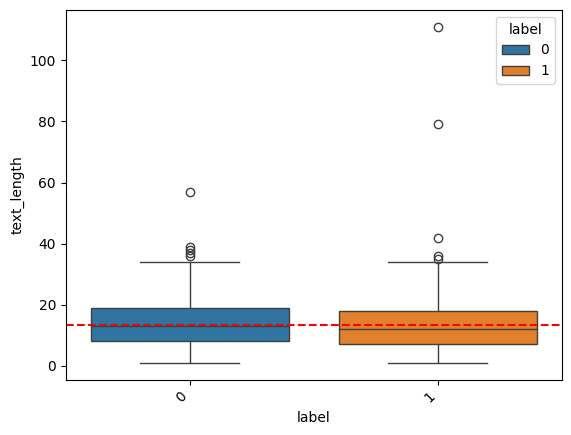

In [138]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [139]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons


# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


## DATA EXPLORATION

#### Hashtags

- 98% of the tweets have no hashtags. Most likely they have been already cleaned.
- Doesn't make sense to keep diving for more insigths.

In [140]:
hashtag_freq = freq_table(df_train,'hashtag')
hashtag_freq = hashtag_freq.sort_values(by='perc',ascending=False)
hashtag_freq['accum'] = hashtag_freq['perc'].cumsum()
print('top 10 hashtags')
display(hashtag_freq[0:10])

top 10 hashtags


,category,count,perc,accum
0,,117261,0.9773,0.9773
1,followfriday,151,0.0013,0.9786
2,fb,149,0.0012,0.9798
3,squarespace,68,0.0006,0.9804
4,FF,39,0.0003,0.9807
5,1,38,0.0003,0.9810
9,iranelection,20,0.0002,0.9812
11,2,18,0.0002,0.9814
10,BSB,19,0.0002,0.9816
12,iremember,18,0.0002,0.9818


#### EMOTIONS

- 98% of the tweets have no emotions. Most likely have been already removed.
- Because they directly express the sentiment of the text, we'll concatenate them to our cleaned tweet corpus.

In [141]:
emotions_freq = freq_table(df_train,'clean_emotions')
emotions_freq = emotions_freq.sort_values(by='perc',ascending=False)
emotions_freq['accum'] = emotions_freq['perc'].cumsum()
print('top 10 emotions')
display(emotions_freq[0:10])

top 10 emotions


,category,count,perc,accum
0,,117325,0.9778,0.9778
1,wink,640,0.0053,0.9831
2,annoyed,507,0.0042,0.9873
3,sad,404,0.0034,0.9907
4,laugh,383,0.0032,0.9939
5,happy,274,0.0023,0.9962
6,tong,205,0.0017,0.9979
7,surprise,146,0.0012,0.9991
8,kiss,33,0.0003,0.9994
31,"surprise, tong",1,0.0000,0.9994


In [142]:
#Concatenate text with emotions
df_train['text_emotion'] = df_train['clean_text']+' '+df_train['clean_emotions']
df_val['text_emotion'] = df_val['clean_text']+' '+df_val['clean_emotions']
df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


### Preprocessor

In [143]:
#Defining preprocessing class to be included in Pipeline later.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


## Text mining - Preprocessing, CountVectorizing and tf-idf

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            #text = text.lower()
            text = "".join([char.lower() for char in text if char not in string.punctuation]) 
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
sent = ['hello . ! my name is! test .. wuhoo']
pre =TextPreprocessor()
pre.fit(sent)
res = pre.transform(sent)
res

['hello name test wuhoo']

#### Exploring positive and negative words using WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


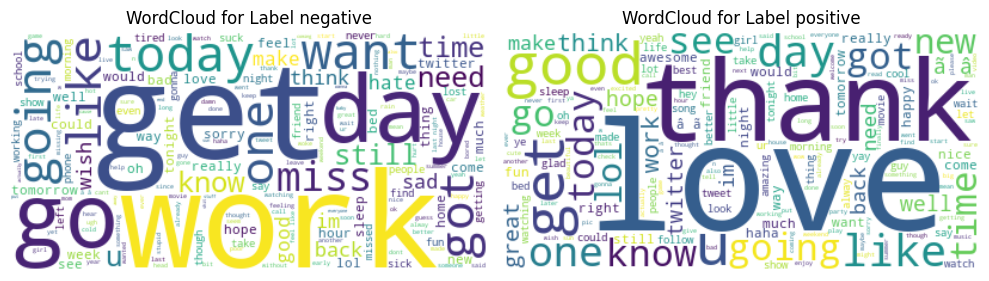

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_train['clean_text'], df_train['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Exploring positive and negative words using Countvectorizer + TF-IDF

In [146]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['clean_text'])



Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

### TF-IDF Score

In [147]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df

# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

238


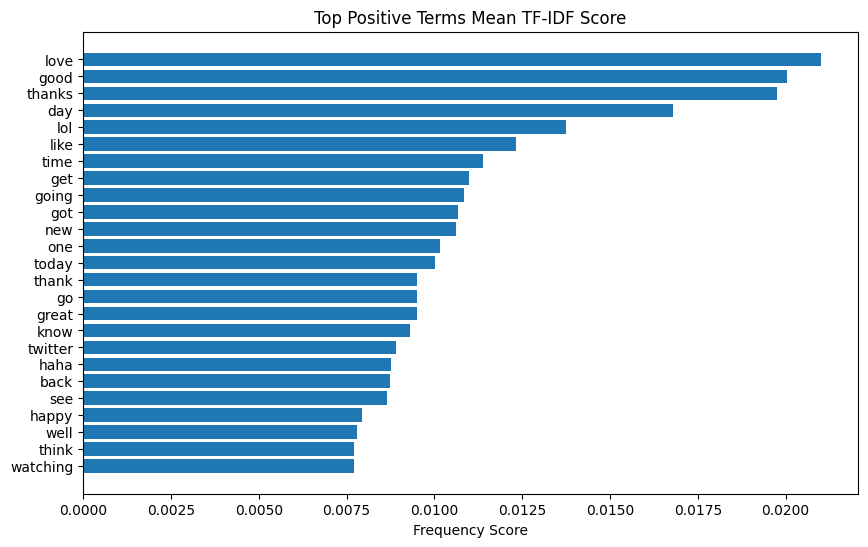

In [148]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

238


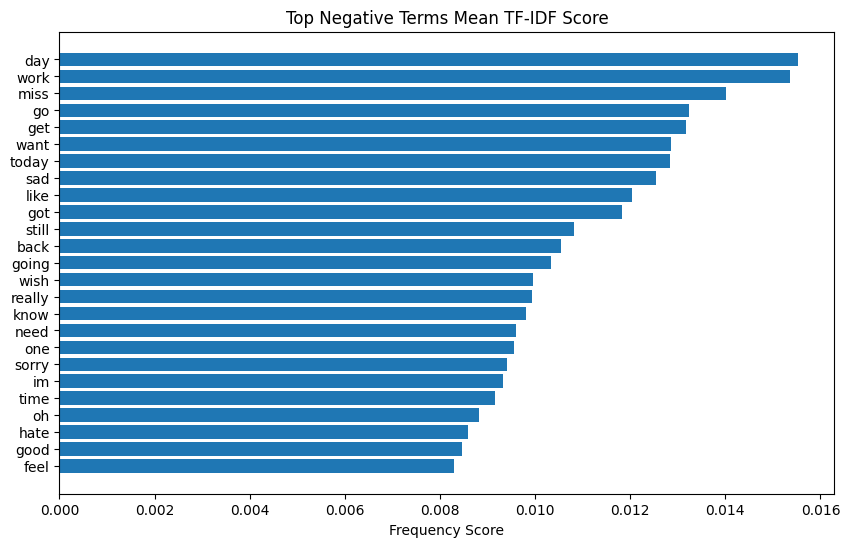

In [149]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

### Analyzing Both Positive and Negative Most Common Topics

In [150]:
from sklearn.decomposition import LatentDirichletAllocation
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_pos_matrix = pipeline.transform(df_train[df_train['label']==1]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=pos_feature_names)

# Fit the model to your TF-IDF matrix
lda.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [151]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


# Print top words for each topic
print_top_words(lda, pos_feature_names, n_top_words=10)

Topic #1: thanks, great, awesome, yay, know, well, week, working, next, also
Topic #2: nice, fun, night, cool, let, make, ok, last, wow, bed
Topic #3: love, haha, day, want, say, think, first, hi, cute, sound
Topic #4: happy, oh, right, need, amazing, finally, still, ya, watch, try
Topic #5: like, hey, yeah, girl, little, made, guy, people, game, work
Topic #6: good, best, life, please, looking, na, ur, music, thing, keep
Topic #7: watching, back, tweet, home, look, show, get, would, soon, aw
Topic #8: thank, twitter, yes, today, going, got, time, movie, song, im
Topic #9: new, see, wait, come, way, glad, take, excited, beautiful, hour
Topic #10: lol, morning, go, one, birthday, friend, tonight, getting, follow, good


In [152]:
def get_top_words(model, feature_names, n_top_words):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

# Get top words for each topic
top_words_per_topic = get_top_words(lda, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_pos_words = [word for sublist in top_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_pos = set(top_pos_words)

In [153]:
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda2 = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_neg_matrix = pipeline.transform(df_train[df_train['label']==0]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_neg_matrix.toarray(), columns=neg_feature_names)

# Fit the model to your TF-IDF matrix
lda2.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [154]:
# Print top words for each topic
print_top_words(lda2, neg_feature_names, n_top_words=10)

Topic #1: know, working, sick, never, missed, week, well, gone, lot, next
Topic #2: miss, sorry, last, night, trying, find, yet, school, aww, hot
Topic #3: want, feel, think, day, say, dont, yeah, love, something, like
Topic #4: sad, hate, oh, need, still, right, tired, morning, cant, tomorrow
Topic #5: work, like, suck, feeling, bored, damn, left, look, really, nothing
Topic #6: wish, na, aw, already, omg, life, keep, gon, please, gon na
Topic #7: back, bad, could, home, lost, get, would, watching, show, car
Topic #8: got, twitter, today, time, going, much, im, year, thought, yes
Topic #9: sleep, hour, new, phone, missing, cold, come, exam, wait, take
Topic #10: hurt, go, ugh, getting, tonight, one, rain, house, bed, someone


In [155]:
# Get top words for each topic
topneg_words_per_topic = get_top_words(lda2, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_neg_words = [word for sublist in topneg_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_neg = set(top_neg_words)

## Random Classifier Performance

Random Classifier Performance (0.25 points): Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an implementation.

**pending**: include preprocessing in the pipeline to properly treat tweets.

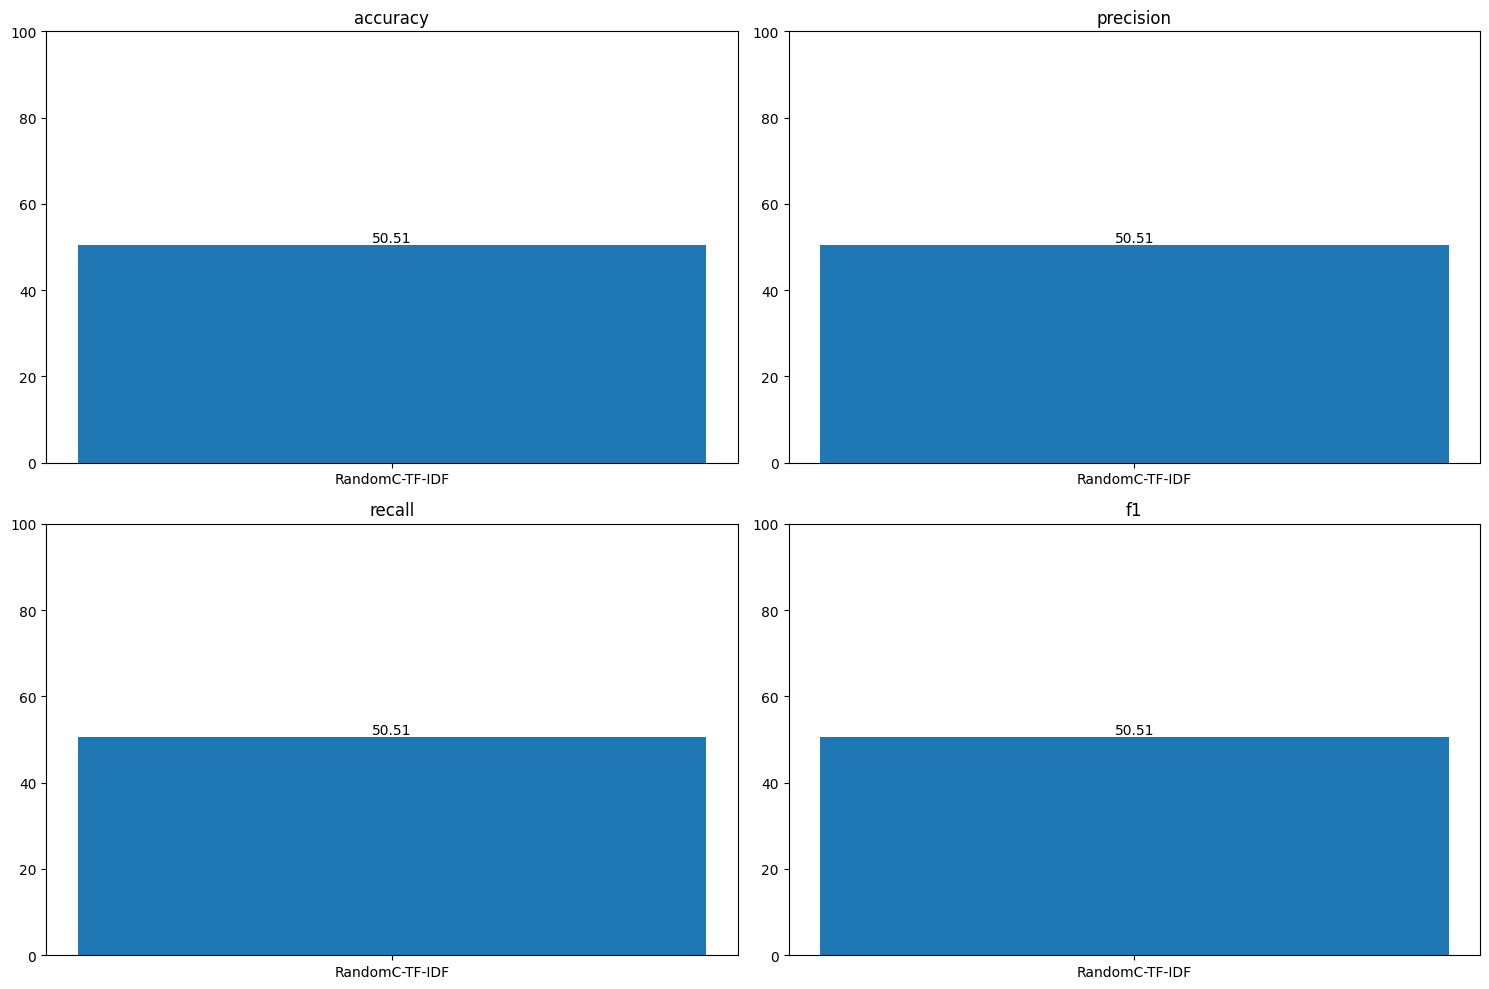

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the classifier to the training data
pipeline.fit(df_train['clean_text'])
##Creating matrix
tf_idf_matrix = pipeline.transform(df_train['clean_text'])
val_idf_matrix = pipeline.transform(df_val['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())
val_mtx = pd.DataFrame(data=val_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())

##Innitializing RandomClassifier
dummy_classifier = DummyClassifier(strategy='uniform')
# Fit the classifier to the training data
dummy_classifier.fit(tfidf_mtx, df_train['label'])

# Make predictions on the testing data
y_pred = dummy_classifier.predict(val_mtx)

# Calculate accuracy (or any other metric)
metrics_val= Metrics()
metrics_val.run(validation_labels, y_pred, "RandomC-TF-IDF")
metrics_val.plot()


## Baseline Implementation

Baseline Implementation (0.5 points): Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

In [158]:
# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']

# Calculate compound score and get tweet length
df_train['sentiment'] = df_train['clean_text'].apply(function)
df_train['clean_length'] = [len(i.split()) for i in df_train['clean_text']]

test = df_train[['clean_text','clean_length','sentiment']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [159]:
#Adding Sentiment Label
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

df_train['sentiment_label'] = df_train['sentiment'].apply(getAnalysis)

#Scaling score to the length of the review
df_train.head(5)

,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion,sentiment,clean_length,sentiment_label
0,@fa6ami86 so happy that salman won. btw the 1...,0,14,so happy that salman won . btw the 1 4 sec cli...,,,so happy that salman won . btw the 1 4 sec cli...,0.7713,16,Positive
1,@phantompoptart .......oops.... I guess I'm ki...,0,14,. oops . i guess i am kinda out of it . blonde...,,,. oops . i guess i am kinda out of it . blonde...,-0.5423,19,Negative
2,@bradleyjp decidedly undecided. Depends on the...,1,19,decidedly undecided . depends on the situation...,,,decidedly undecided . depends on the situation...,-0.2944,24,Negative
3,@Mountgrace lol i know! its so frustrating isn...,1,9,lol i know ! its so frustrating isnt it ? !,,,lol i know ! its so frustrating isnt it ? !,-0.3664,11,Negative
4,@kathystover Didn't go much of any where - Lif...,1,14,did not go much of any where - life took over ...,,,did not go much of any where - life took over ...,0.0000,14,Neutral


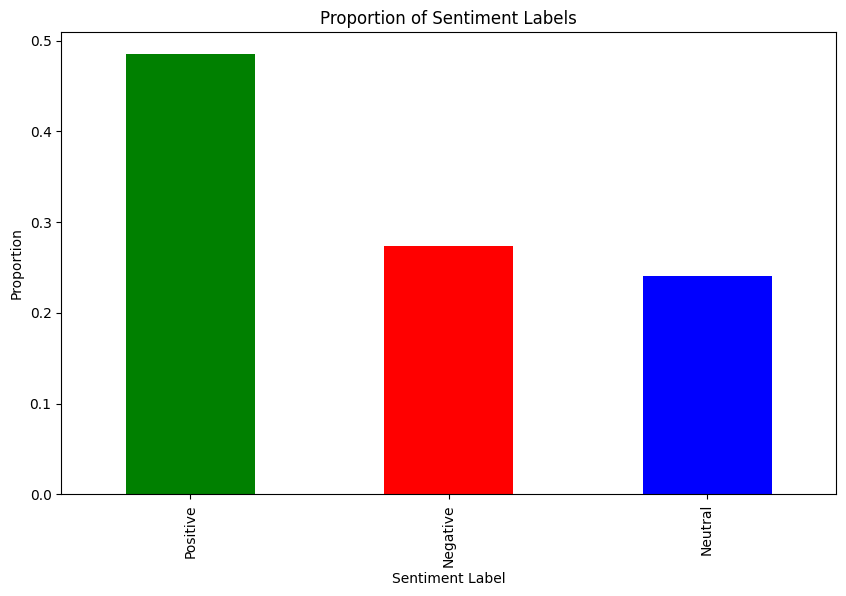

In [160]:
import matplotlib.pyplot as plt

# Get counts of each category in 'sentiment_label'
sentiment_counts = df_train['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_train)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()


## Looking at WordCloud for inspection of Neutral Words

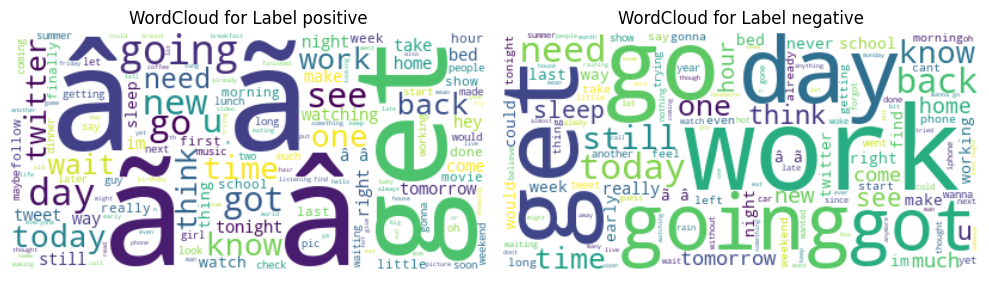

In [161]:
## Looking at a WordCloud to inspect the words in neutral

labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_train[df_train['sentiment_label']=='Neutral']['clean_text'], df_train[df_train['sentiment_label']=='Neutral']['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Classifying Neutral tweets

In [162]:
#Clasifying neutral 
# Iterate over rows of DataFrame where 'sentiment_label' is 'Neutral'
for index, row in df_train[df_train['sentiment_label'] == 'Neutral'].iterrows():
    # Analyze sentiment of the text
    score = vader.polarity_scores(row['clean_text'])
    if score['compound'] == 0:  # Positive sentiment
        df_train.at[index, 'sentiment_label'] = 'Negative' ##Any tweet that has no good emotion will be treated as negative
    else:  # Neutral sentiment
        df_train.at[index, 'sentiment_label'] = 'Positive'


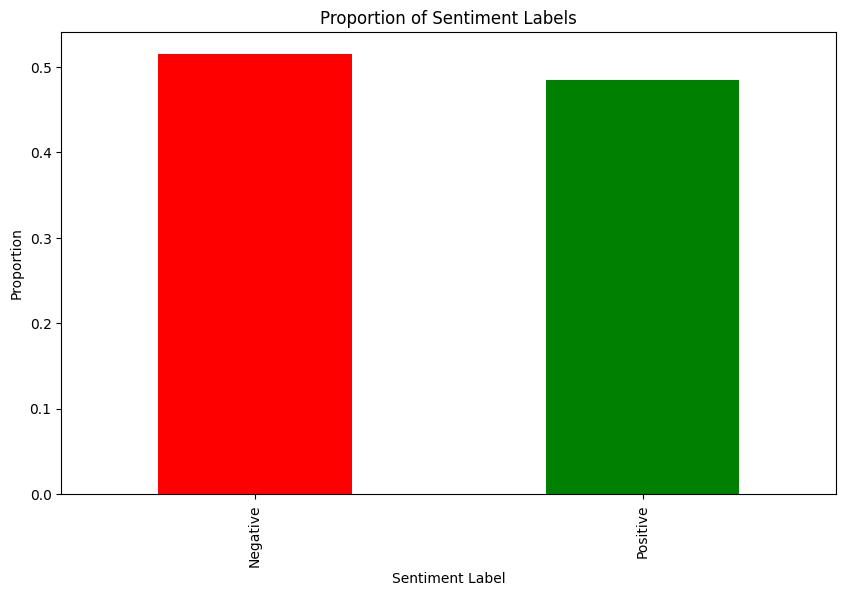

In [163]:
# Get counts of each category in 'sentiment_label'
sentiment_counts = df_train['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_train)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()

### Rule-Based Model Performance

In [164]:
#Convert to binary
df_train['sentiment_label'] = [1 if x == 'Positive' else 0 for x in df_train['sentiment_label']]
y_pred = df_train['sentiment_label']
original_labels = df_train['label']

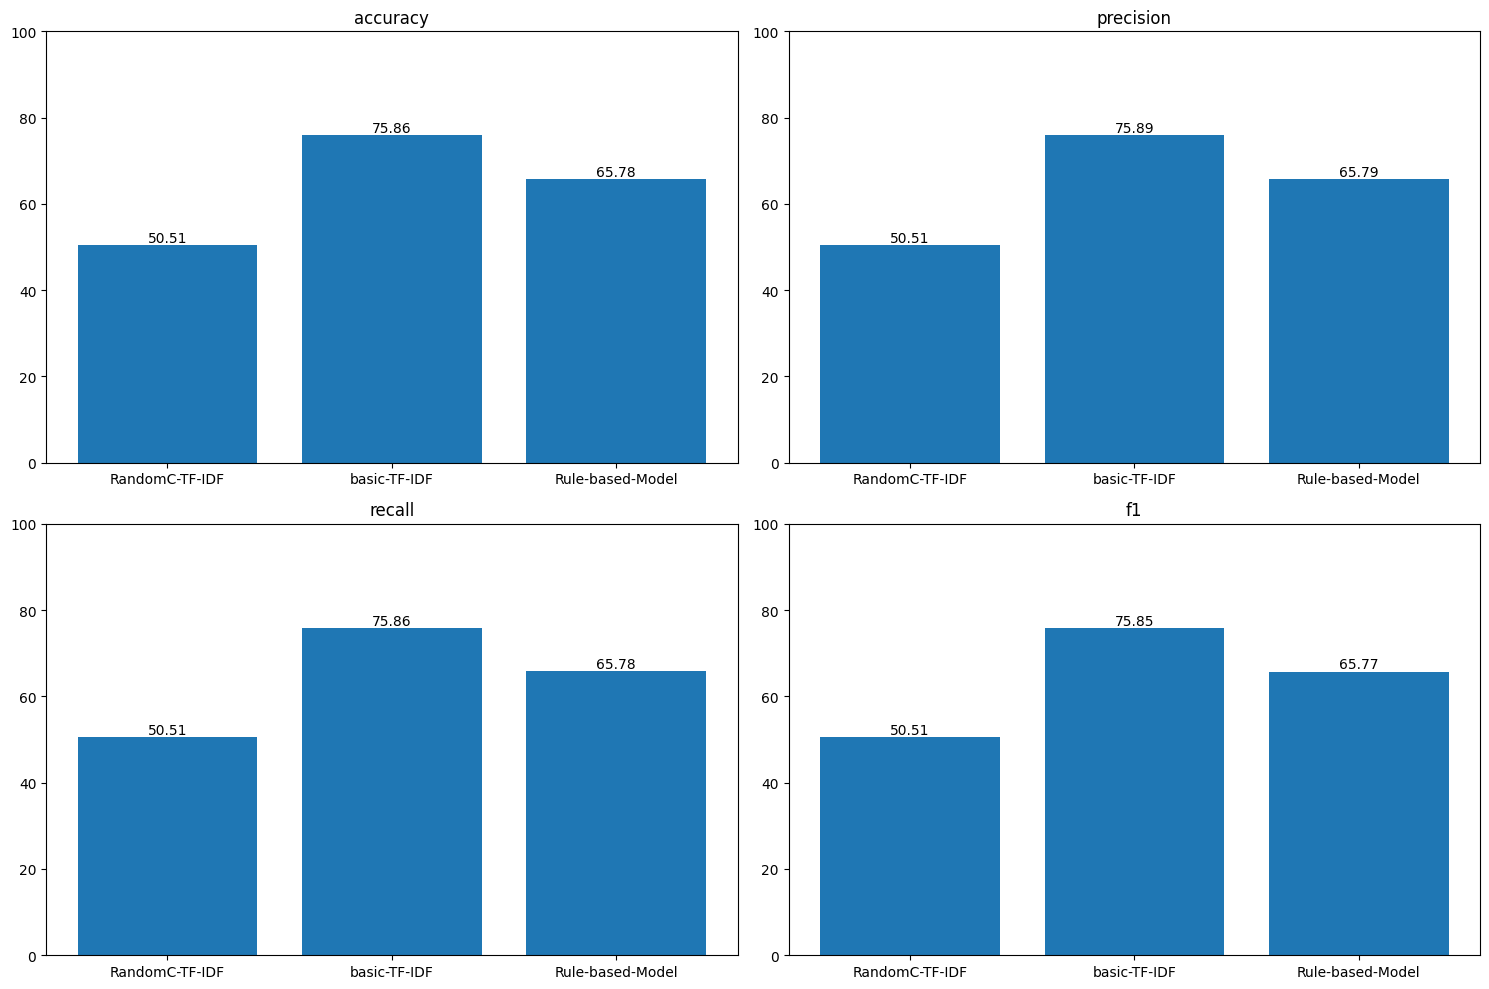

In [165]:
## Model Performance

metrics_val.run(original_labels, y_pred, "Rule-based-Model")
metrics_val.plot()